In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
request_reply_df = pd.read_csv("./data/requestreply.csv", header=None)
reply_reply_df = pd.read_csv("./data/replyreply.csv", header=None)

In [3]:
request_reply_df.describe()

,2,3,4,5,6,7,8,9,10,11,...,92,93,94,95,96,97,98,99,100,101
count,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,...,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000
mean,168.552801,80.671077,38.756572,32.053867,30.741587,29.762200,29.199574,27.477508,26.854041,25.994097,...,25.061934,25.304607,25.449759,25.352015,25.144316,25.101272,26.139811,26.930865,28.847339,33.734174
std,143.484703,139.634386,124.942185,115.652077,108.482573,103.805790,114.714679,104.206368,100.228591,97.246000,...,103.891678,103.689839,104.585712,104.140811,105.343442,105.831126,108.482392,113.407518,149.541268,157.315308
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,110.203981,10.664463,7.254362,6.472051,6.865978,6.719649,6.819010,6.800115,6.838262,6.684005,...,6.622315,6.737947,6.783962,6.749630,6.704092,6.692827,6.615638,6.826102,6.601989,6.671906
50%,125.361919,27.813911,11.111021,9.940505,10.165453,10.082960,10.182023,10.108947,10.139465,10.075569,...,10.021448,10.118008,10.111928,10.084033,10.094404,10.052443,10.025501,10.061979,10.042549,10.014534
75%,216.209472,114.264309,19.995451,15.584529,15.759706,15.511990,15.537262,15.574992,15.710831,15.468359,...,15.242099,15.369892,15.529871,15.397132,15.461623,15.429079,15.504480,15.425980,15.324474,15.388250
max,5317.913055,5216.073036,5111.930847,5008.516073,4904.536963,4800.885916,6366.826057,6265.555143,6161.940098,6053.858995,...,8872.637033,8973.212957,9074.537039,9175.518036,9275.300026,9375.156164,9476.207972,9576.614857,9934.896946,10035.484076


In [4]:
request_reply_df.rename(columns={0:'Benign', 1:"appname"}, inplace=True)

In [5]:
request_reply_df["Benign"].replace('legit', 1, inplace=True)
request_reply_df["Benign"].replace('malware', 0, inplace=True)

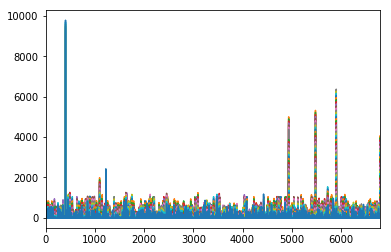

In [6]:
benignware = request_reply_df.loc[request_reply_df["Benign"] == 1]
benignware.plot(legend=False)

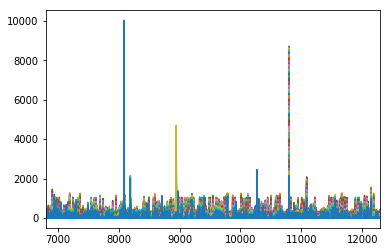

In [7]:
malware = request_reply_df.loc[request_reply_df["Benign"] == 0]
malware.plot(legend=False)

In [8]:
from prototype_model import *

In [9]:
features = generate_features(request_reply_df)
model = build_fc_model(features)
fc_qr_history, fc_qr_results = train_model(model, request_reply_df)

Epoch 1/15


W0905 19:29:49.060017 4544947648 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow_core/python/ops/nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


178/178 [==============================] - 4s 24ms/step - loss: 3.0034 - accuracy: 0.5378 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/15
178/178 [==============================] - 1s 8ms/step - loss: 1.2184 - accuracy: 0.5773 - val_loss: 1.1040 - val_accuracy: 0.5717
Epoch 3/15
178/178 [==============================] - 1s 7ms/step - loss: 0.8796 - accuracy: 0.6058 - val_loss: 1.0293 - val_accuracy: 0.5915
Epoch 4/15
178/178 [==============================] - 1s 7ms/step - loss: 0.7089 - accuracy: 0.6447 - val_loss: 0.8849 - val_accuracy: 0.5934
Epoch 5/15
178/178 [==============================] - 1s 7ms/step - loss: 0.6376 - accuracy: 0.6748 - val_loss: 0.8667 - val_accuracy: 0.5851
Epoch 6/15
178/178 [==============================] - 1s 8ms/step - loss: 0.5794 - accuracy: 0.6949 - val_loss: 0.8864 - val_accuracy: 0.6087
Epoch 7/15
178/178 [==============================] - 1s 7ms/step - loss: 0.5687 - accuracy: 0.7073 - val_loss: 0.8434 - val_accuracy: 0.5997
Epoch 8/

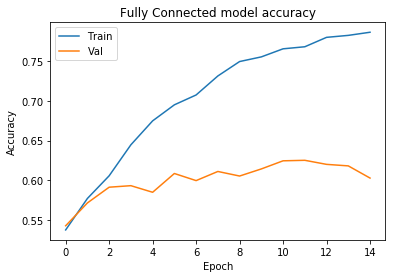

In [10]:
plt.plot(fc_qr_history.history['accuracy'])
plt.plot(fc_qr_history.history['val_accuracy'])
plt.title('Fully Connected model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [11]:
features = generate_features(reply_reply_df)
model = build_fc_model(features)
fc_rr_history, fc_rr_results = train_model(model, reply_reply_df)

W0905 19:30:13.475410 4544947648 base_layer.py:1772] Layer sequential_1 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Epoch 1/15
178/178 [==============================] - 4s 22ms/step - loss: 2.5428 - accuracy: 0.5099 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/15
178/178 [==============================] - 1s 8ms/step - loss: 0.9951 - accuracy: 0.5252 - val_loss: 0.8166 - val_accuracy: 0.5468
Epoch 3/15
178/178 [==============================] - 1s 8ms/step - loss: 0.7732 - accuracy: 0.5430 - val_loss: 0.8420 - val_accuracy: 0.5672
Epoch 4/15
178/178 [==============================] - 1s 8ms/step - loss: 0.7782 - accuracy: 0.5384 - val_loss: 0.7701 - val_accuracy: 0.5730
Epoch 5/15
178/178 [==============================] - 1s 8ms/step - loss: 0.7144 - accuracy: 0.5526 - val_loss: 0.7649 - val_accuracy: 0.5723
Epoch 6/15
178/178 [==============================] - 1s 8ms/step - loss: 0.7024 - accuracy: 0.5684 - val_loss: 0.7732 - val_accuracy: 0.5768
Epoch 7/15
178/178 [==============================] - 1s 8ms/step - loss: 0.7112 - accuracy: 0.5667 - val_loss: 0.7641 - val_accuracy: 0.56

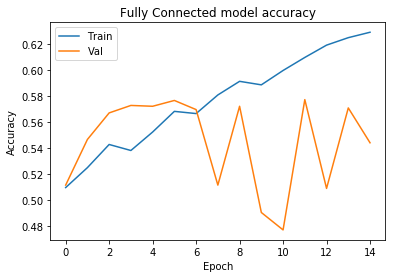

In [12]:
plt.plot(fc_rr_history.history['accuracy'])
plt.plot(fc_rr_history.history['val_accuracy'])
plt.title('Fully Connected model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [13]:
features = generate_features(request_reply_df)
model = build_conv_model(features)
conv_qr_history, conv_qr_results = train_model(model, request_reply_df)

W0905 19:30:38.383227 4544947648 base_layer.py:1772] Layer sequential_2 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Epoch 1/15
178/178 [==============================] - 6s 33ms/step - loss: 0.7906 - accuracy: 0.5449 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/15
178/178 [==============================] - 3s 16ms/step - loss: 0.6621 - accuracy: 0.6277 - val_loss: 0.7047 - val_accuracy: 0.6074
Epoch 3/15
178/178 [==============================] - 3s 16ms/step - loss: 0.6056 - accuracy: 0.6851 - val_loss: 0.6066 - val_accuracy: 0.6979
Epoch 4/15
178/178 [==============================] - 3s 17ms/step - loss: 0.5520 - accuracy: 0.7300 - val_loss: 0.5836 - val_accuracy: 0.7094
Epoch 5/15
178/178 [==============================] - 3s 16ms/step - loss: 0.5166 - accuracy: 0.7488 - val_loss: 0.5558 - val_accuracy: 0.7368
Epoch 6/15
178/178 [==============================] - 3s 16ms/step - loss: 0.4712 - accuracy: 0.7767 - val_loss: 0.6452 - val_accuracy: 0.6985
Epoch 7/15
178/178 [==============================] - 3s 16ms/step - loss: 0.4344 - accuracy: 0.7905 - val_loss: 0.6133 - val_accuracy

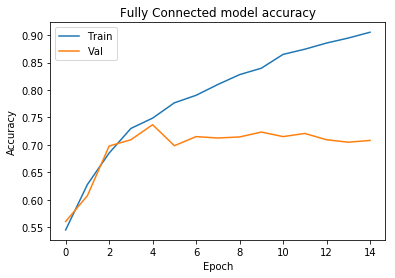

In [14]:
plt.plot(conv_qr_history.history['accuracy'])
plt.plot(conv_qr_history.history['val_accuracy'])
plt.title('Fully Connected model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [16]:
print(fc_qr_results, fc_rr_results, conv_qr_results)

[1.058750747023402, 0.6081301] [0.7506966606990711, 0.56422764] [1.1877554236231624, 0.70135504]
